# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [33]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [34]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We chose Rotterdam and Lond...
1,✅ Trip Verified | The entire booking and ticke...
2,Not Verified | British Airways cancelled my ...
3,Not Verified | I wanted to write this review s...
4,✅ Trip Verified | Check in fast and friendly....


In [35]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [36]:
reviews= pd.read_csv("BA_reviews.csv")
reviews=reviews.pop('reviews')
reviews

0       ✅ Trip Verified |  We chose Rotterdam and Lond...
1       ✅ Trip Verified | The entire booking and ticke...
2       Not Verified |   British Airways cancelled my ...
3       Not Verified | I wanted to write this review s...
4       ✅ Trip Verified |  Check in fast and friendly....
                              ...                        
3595    LHR-SIN 26 July 2014. Upgraded from WTP to Clu...
3596    Flight BA283 LHR-LAX on 31/5/2014 onboard G-XL...
3597    Round-trip with family from JFK to HYD via LHR...
3598    LHR-BSL-LHR 22nd/23rd July BA748 and BA755 A31...
3599    We flew to Rome from Newcastle via Heathrow th...
Name: reviews, Length: 3600, dtype: object

In [37]:
def remove_punctuation(txt):
    for punctuation in string.punctuation:
        txt = txt.replace(punctuation, '')
    return txt

In [38]:
reviews= reviews.str.replace('Trip verified |','')
reviews= reviews.str.replace('✅','')
reviews= reviews.str.replace('|','')
reviews= reviews.str.replace(r'\b(\w{1,3})\b','')
reviews

0        Trip Verified   We chose Rotterdam and London...
1        Trip Verified  The entire booking and ticketi...
2       Not Verified    British Airways cancelled my f...
3       Not Verified  I wanted to write this review so...
4        Trip Verified   Check in fast and friendly. S...
                              ...                        
3595    LHR-SIN 26 July 2014. Upgraded from WTP to Clu...
3596    Flight BA283 LHR-LAX on 31/5/2014 onboard G-XL...
3597    Round-trip with family from JFK to HYD via LHR...
3598    LHR-BSL-LHR 22nd/23rd July BA748 and BA755 A31...
3599    We flew to Rome from Newcastle via Heathrow th...
Name: reviews, Length: 3600, dtype: object

In [39]:
reviews.shape

(3600,)

In [40]:
freq_words = pd.Series(' '.join(reviews).lower().split()).value_counts()[:50]
freq_words

the         29246
to          19409
and         17910
a           13292
was         12684
i           10613
of           8394
in           8071
on           7608
for          6183
with         5737
flight       4984
not          4612
is           4600
were         4359
we           4194
my           4147
that         4146
ba           3907
it           3874
but          3842
at           3772
they         3547
had          3452
this         3378
as           3362
have         3287
from         2986
no           2833
very         2687
be           2289
verified     2246
service      2174
-            2158
british      2155
so           2062
are          2058
an           2024
you          2010
food         1986
seat         1894
crew         1827
which        1802
london       1723
cabin        1717
seats        1662
me           1656
our          1652
airways      1645
there        1605
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_25948\4128480448.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  freq_words.plot.barh(x=freq_words[0],y=freq_words[1])


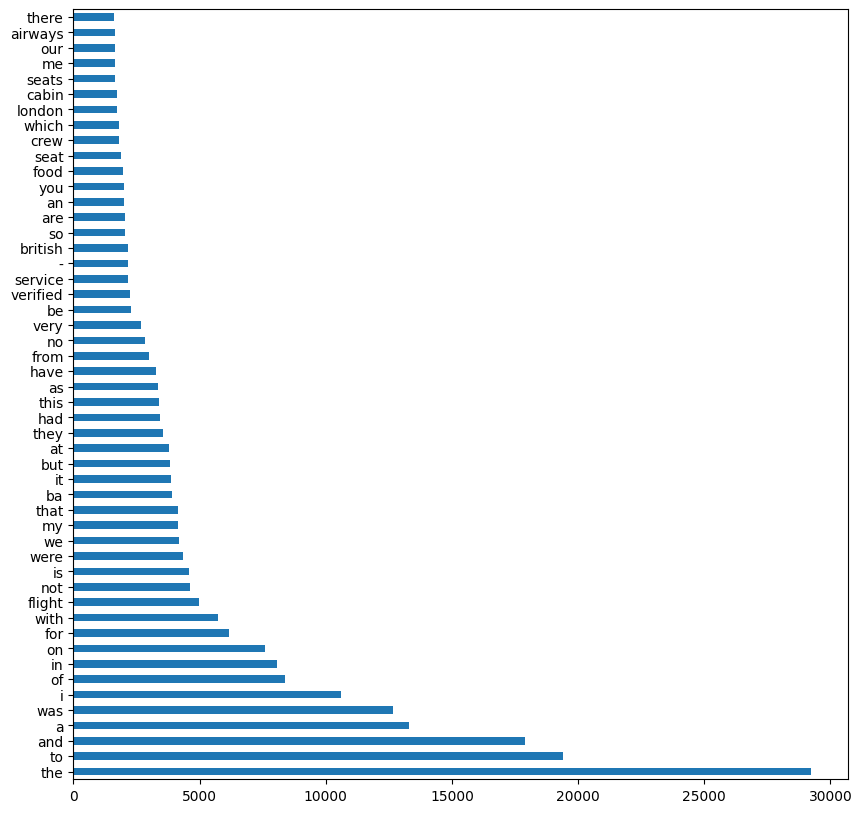

In [41]:
plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0],y=freq_words[1])
plt.show()

In [42]:
categories=['negative', 'positive']
num_cat=len(categories)
num_cat

2

In [43]:
#The Natural Language Toolkit (NLTK) is a Python package for natural language processing. 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

tokenizer= RegexpTokenizer(r"\w+")

tf_idf_vectorizer= TfidfVectorizer( lowercase=True,
                                   stop_words='english',
                                   ngram_range=(1,1),
                                   tokenizer= tokenizer.tokenize )

reviews_counts= tf_idf_vectorizer.fit_transform(reviews)
reviews_counts.shape

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3600, 13753)

In [44]:
from sklearn.cluster import KMeans

KMeans= KMeans(n_clusters=num_cat).fit(reviews_counts)


pred_labels= KMeans.labels_
pred_labels

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 1, 0, 1])

In [45]:
cluster_centers= KMeans.cluster_centers_
cluster_centers

array([[3.27941723e-04, 8.70724328e-04, 7.79910052e-04, ...,
        6.33108324e-05, 9.23811238e-05, 0.00000000e+00],
       [7.97376042e-04, 4.38281380e-03, 1.24449476e-03, ...,
        0.00000000e+00, 0.00000000e+00, 4.62731083e-05]])

In [48]:
unique, counts = np.unique(pred_labels,return_counts=True)
dict(zip(unique, counts))

{0: 2164, 1: 1436}

In [52]:
from sklearn import metrics

dbi=metrics.davies_bouldin_score(reviews_counts.toarray(),pred_labels)

ss=metrics.silhouette_score(reviews_counts.toarray(),pred_labels,metric='euclidean')

print("DBI score: ",dbi,"\nSilhouette score: ",ss)

DBI score:  12.532456736960246 
Silhouette score:  0.0064750050533882745


In [53]:
df_reviews= pd.DataFrame({'review':reviews,'label':pred_labels})
df_reviews

,review,label
0,Trip Verified We chose Rotterdam and London...,1
1,Trip Verified The entire booking and ticketi...,1
2,Not Verified British Airways cancelled my f...,1
3,Not Verified I wanted to write this review so...,1
4,Trip Verified Check in fast and friendly. S...,0
...,...,...
3595,LHR-SIN 26 July 2014. Upgraded from WTP to Clu...,0
3596,Flight BA283 LHR-LAX on 31/5/2014 onboard G-XL...,0
3597,Round-trip with family from JFK to HYD via LHR...,1
3598,LHR-BSL-LHR 22nd/23rd July BA748 and BA755 A31...,0


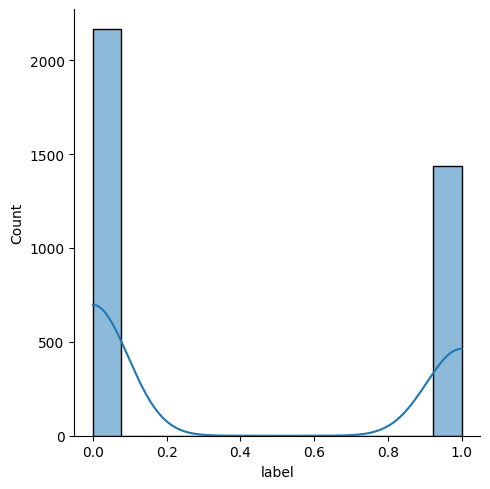

In [54]:
sns.displot(df_reviews['label'], kde=True)

In [55]:
postive_reviews= df_reviews[df_reviews['label']==1]
postive_reviews

,review,label
0,Trip Verified We chose Rotterdam and London...,1
1,Trip Verified The entire booking and ticketi...,1
2,Not Verified British Airways cancelled my f...,1
3,Not Verified I wanted to write this review so...,1
8,Not Verified We have flown this route with E...,1
...,...,...
3574,I was on BA 835 from Dublin to LHR on 25th Jul...,1
3578,June 25th 2014. My wife and daughter boarded i...,1
3584,06.40 flight 4 August Glasgow to London City c...,1
3597,Round-trip with family from JFK to HYD via LHR...,1


In [56]:
negative_reviews= df_reviews[df_reviews['label']==0]
negative_reviews

,review,label
4,Trip Verified Check in fast and friendly. S...,0
5,Trip Verified This is the first time I have...,0
6,Trip Verified Flew business class from Doha...,0
7,Trip Verified Starting off at Heathrow Term...,0
9,Trip Verified A last minute business trip to...,0
...,...,...
3593,Toronto to London in WTP on a 787 and London t...,0
3594,12/2013. LHR-LAX. A380. Aircraft was clean. Se...,0
3595,LHR-SIN 26 July 2014. Upgraded from WTP to Clu...,0
3596,Flight BA283 LHR-LAX on 31/5/2014 onboard G-XL...,0
